In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train.csv")
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
print(data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
print("Data in rows and columns as : ", data.shape)
data.info()

Data in rows and columns as :  (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQua

In [5]:
data.describe()
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Required to implement a linear regression model to predict the prices of houses based on their square footage 
and the number of bedrooms and bathrooms.
So, we will need columns LotArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr and Sale Price.

In [6]:
data_2 = data[['Id', 'LotArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'SalePrice']]
data_2.head()

,Id,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
0,1,8450,1,0,2,1,3,208500
1,2,9600,0,1,2,0,3,181500
2,3,11250,1,0,2,1,3,223500
3,4,9550,1,0,1,0,3,140000
4,5,14260,1,0,2,1,4,250000


In [7]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id            1460 non-null   int64
 1   LotArea       1460 non-null   int64
 2   BsmtFullBath  1460 non-null   int64
 3   BsmtHalfBath  1460 non-null   int64
 4   FullBath      1460 non-null   int64
 5   HalfBath      1460 non-null   int64
 6   BedroomAbvGr  1460 non-null   int64
 7   SalePrice     1460 non-null   int64
dtypes: int64(8)
memory usage: 91.4 KB


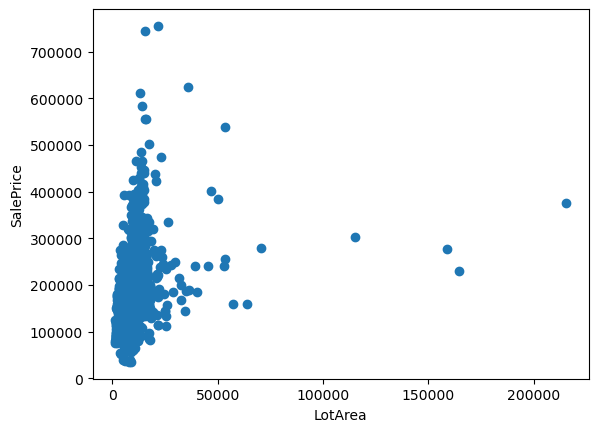

In [8]:
plt.scatter(data['LotArea'], data['SalePrice'])
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

In [9]:
import seaborn as sns
correlation_matrix = data_2.corr()

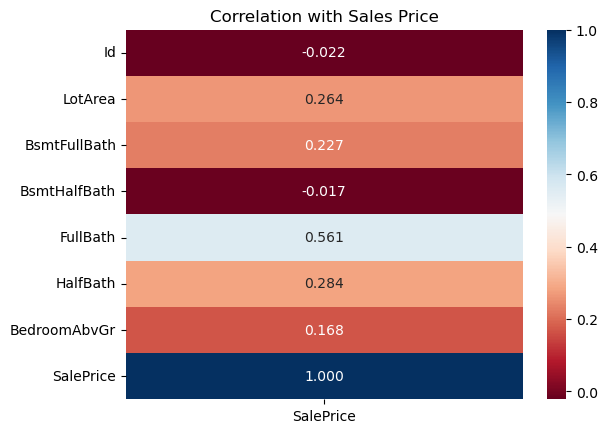

In [10]:
plt.figure()
sns.heatmap(correlation_matrix[['SalePrice']], annot = True, cmap = 'RdBu', fmt = "0.3f")
plt.title("Correlation with Sales Price")
plt.show()

# Model Training: 

In [11]:
X = data_2[['LotArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr']]
y = data_2[['SalePrice']]           

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
print(model.intercept_, model.coef_, model.score(X_train, y_train))

[28914.50162994] [[ 1.18321698e+00  3.63048614e+04  8.03294944e+04  3.64426077e+04
  -5.49042086e+03]] 0.47335254875042687


0.3983627407775868
43828.15134972896
209.3517407372792


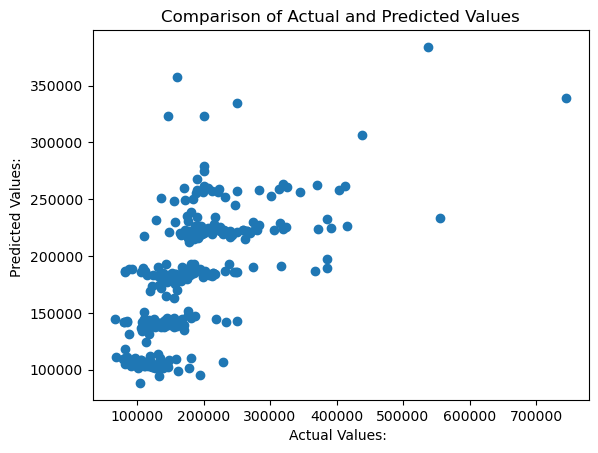

In [17]:
# Model Evaluation
y_pred = model.predict(X_test)
# pred_df=pd.DataFrame({'Actual Value': y_test.squeeze(), 'Predicted Value': y_pred.squeeze(), 'Difference': difference.squeeze()})
# pred_df = head()

r_squared = r2_score(y_test, y_pred)
merr = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(merr)
print(r_squared)
print(merr)
print(rmse)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values: ")
plt.ylabel("Predicted Values: ")
plt.title("Comparison of Actual and Predicted Values")
plt.show()

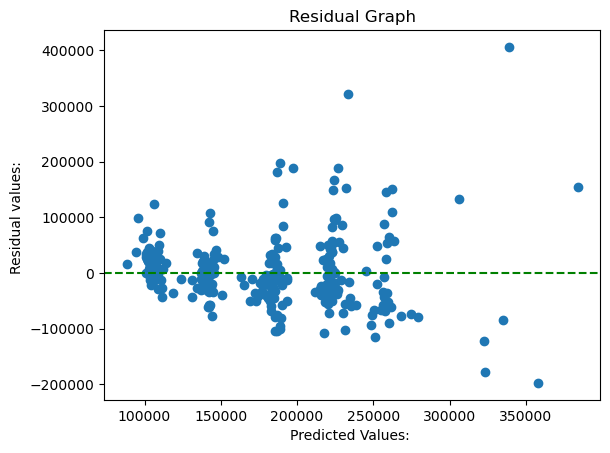

R-squared: 0.3983627407775868
Mean Absolute Error: 43828.15134972896
Root Mean Squared Error: 209.3517407372792


In [15]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values: ")
plt.ylabel("Residual values: ")
plt.axhline(y = 0, color = 'g', linestyle = '--')
plt.title("Residual Graph")
plt.show()

# Print evaluation metrics
print("R-squared:", r_squared)
print("Mean Absolute Error:", merr)
# print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

In [16]:
from sklearn.metrics import r2_score

Accuracy = r2_score(y_test, y_pred) * 100
print(" Accuracy of the model is: %.2f." %Accuracy)

 Accuracy of the model is: 39.84.
